# Section 1: Title & Introduction

## **Introduction**
In the fast-paced world of automotive sales, price is not just a number; it is a signal. It reflects the brand's prestige, the engine's power, and the condition of the vehicle. As data scientists, our job is to look under the hood—not of the cars, but of the data itself.

We have been handed a dataset containing **2,500 records** of vehicle transactions. Our mission is to perform **Exploratory Data Analysis (EDA)** to understand the heartbeat of this market. We are looking for patterns: Does a "Like New" car truly command a premium? Does the market prefer Electric over Diesel?

However, as we will soon discover, not everything in this dataset is as it seems. Let’s begin our journey.

# Section 2: The Inspection

### **Chapter 1: The Inspection (Data Loading & Review)**

Before we can drive, we must inspect the vehicle. In data terms, this means loading the libraries and the dataset to ensure everything is in working order.

**The Logic:**
* `pandas` and `numpy`: The engine and transmission for data manipulation.
* `matplotlib` and `seaborn`: The dashboard that visualizes our metrics.
* `sns.set(style="whitegrid")`: A stylistic choice to add a grid background, making charts easier to read and giving them a professional look.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

Data = pd.read_csv('/kaggle/input/cars-pre/car_price_prediction_.csv')
print('Data shape is:\n ', Data.shape)
print('----------------\nThe head of the Data:\n ')
Data.head()

Data shape is:
  (2500, 10)
----------------
The head of the Data:
 


,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


> **🕵️ The Reality Check (Spotting Anomalies):**
> *Wait, a Petrol Tesla?* Upon closer inspection of the first few rows, we notice something peculiar. Row 0 lists a **'Tesla'** with **'Petrol'** fuel, and Row 3 shows a **'Tesla'** running on **'Diesel'**. Since Teslas are exclusively electric vehicles, this is a major red flag. It suggests that our dataset is likely **synthetic**—a simulation of data rather than a record of real-world transactions. While the data is structured perfectly, the content defies automotive logic.

**The "Mechanic's Check" (Info & Describe):**
Now we check the fluids and tire pressure.
* `.info()` tells us if we have any "leaks" (null values) and confirms data types.
* `.describe()` gives us the statistical limits (e.g., min/max prices).

# Section 3: Data Cleaning

### **Chapter 2: Detailing the Vehicle (Data Cleaning)**

A raw dataset is like a car covered in dust. We need to polish it.

**The Trick:**
The `Car ID` column is unique for every row. In machine learning, unique identifiers are noise—they prevent the model from generalizing because they don't represent a shared characteristic.
* **Action:** We drop `Car ID`.
* **Sanity Check:** We explicitly check for `isnull()` (missing data) and `.duplicated()` (repeat entries) to ensure our analysis is based on clean, unique evidence.

In [14]:
Data = Data.drop('Car ID', axis=1)
messy_data = Data.isnull().sum().to_frame('Null')
messy_data['Duplicated'] = Data.duplicated().sum()
messy_data

,Null,Duplicated
Brand,0,0
Year,0,0
Engine Size,0,0
Fuel Type,0,0
Transmission,0,0
Mileage,0,0
Condition,0,0
Price,0,0
Model,0,0


# Section 4: Mapping & Grouping

### **Chapter 3: Mapping the Territory (Categorical Grouping)**

Before visualizing, we need to understand the hierarchy. Which models belong to which brands?

**The Insight:**
Using `groupby`, we can instantly see the product lineup for every manufacturer. This confirms if our dataset is balanced or if it's dominated by one specific model.

In [15]:
BrandAndModel = Data.groupby('Brand')['Model'].unique().to_frame().reset_index()
BrandAndModel

,Brand,Model
0,Audi,"[A4, Q7, Q5, A3]"
1,BMW,"[5 Series, X3, X5, 3 Series]"
2,Ford,"[Mustang, Explorer, Fiesta, Focus]"
3,Honda,"[Civic, CR-V, Accord, Fit]"
4,Mercedes,"[GLA, C-Class, E-Class, GLC]"
5,Tesla,"[Model X, Model Y, Model 3, Model S]"
6,Toyota,"[Camry, Corolla, Prius, RAV4]"


# Section 5: Univariate Analysis (Visualizations)

### **Chapter 4: The Landscape of Value (Univariate Analysis)**

Now, the visual storytelling begins. We examine one variable at a time.

**1. The Price Spectrum (Histogram)**
We want to know: **Is the market dominated by cheap cars, luxury cars, or a mix?**
* **The Trick:** The `kde` (Kernel Density Estimate) draws a smooth line over the bars to show the "shape" of the distribution.


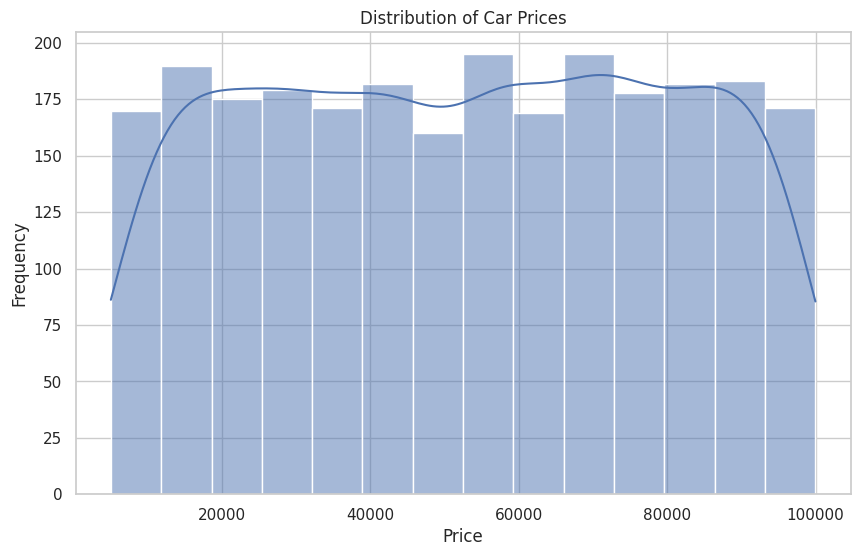

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(Data['Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show() 

**2. The Badge Premium (Point Plot)**
Does the brand name change the price?
* **The Trick:** Unlike a bar chart, a point plot focuses on the **mean (average)** and the uncertainty around it. The vertical lines (whiskers) show the variance.

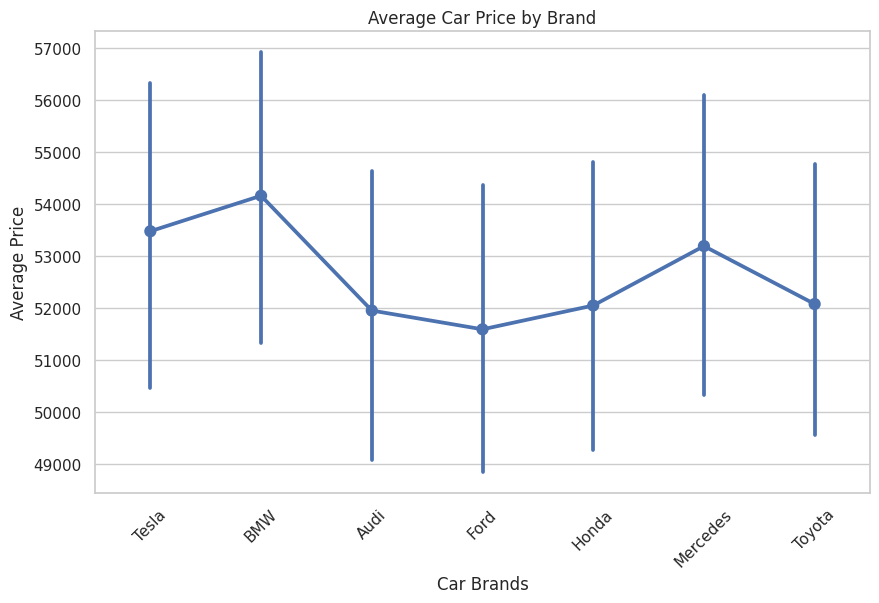

In [17]:
plt.figure(figsize=(10,6))
sns.pointplot(x="Brand", y="Price", data=Data)
plt.title("Average Car Price by Brand")
plt.xlabel("Car Brands")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

**3. The Timeline (Line Plot)**
How does age affect value?
* **The Trick:** The `ci=30` (Confidence Interval) reduces visual noise from outliers, focusing on the core trend.

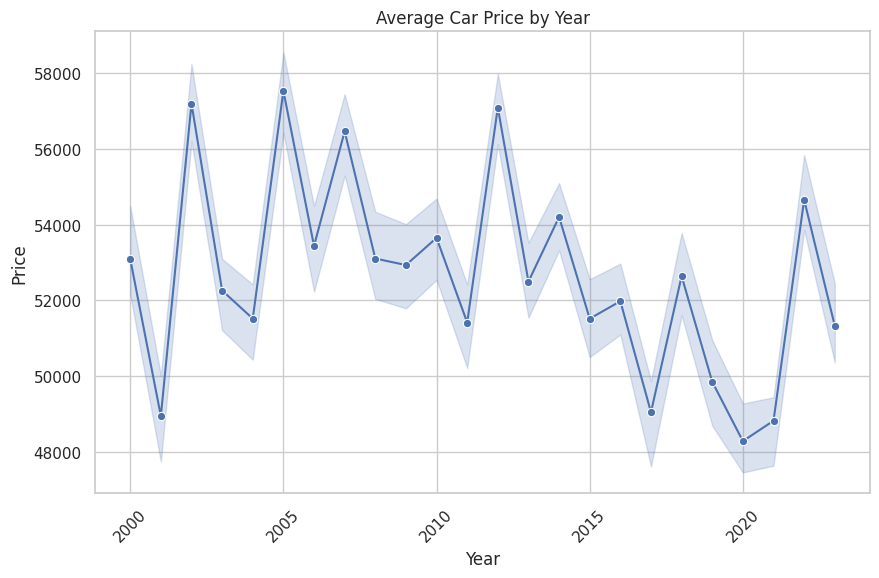

In [18]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="Price", data=Data, marker='o', errorbar=('ci', 30))
plt.title("Average Car Price by Year",)
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

**4. The Condition Factor**
Does a "Like New" car compete with a "New" one?

**The Code:** Grouped lineplot by categorical data (Condition). This visually ranks the conditions based on price.

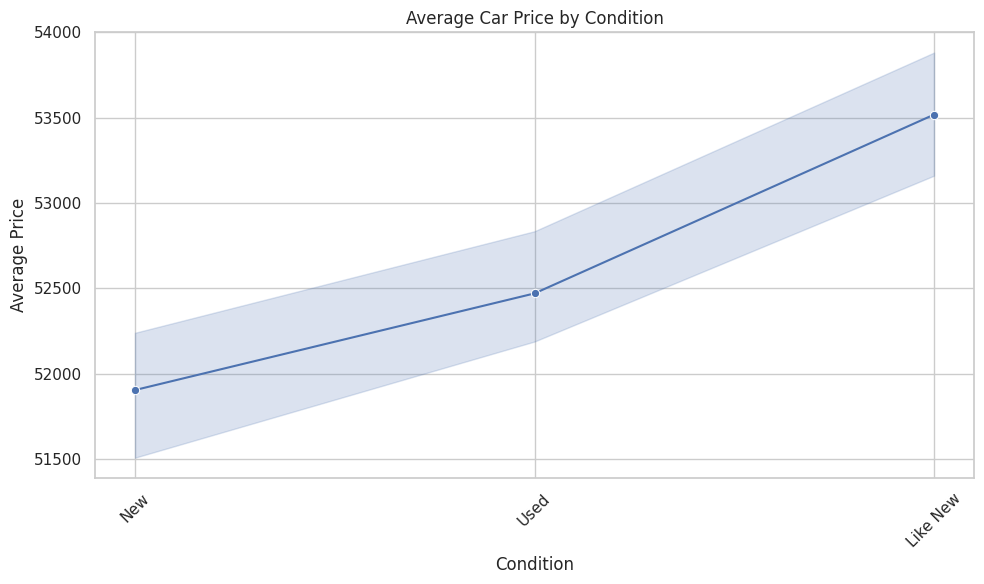

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Condition", y="Price", data=Data, marker='o',errorbar=('ci', 30))
plt.title("Average Car Price by Condition")
plt.xlabel("Condition")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Section 6: Multivariate Analysis

### **Chapter 5: Under the Hood (Multivariate Analysis)**

**The Tech Stack (Count Plot)**
We need to see the relationship between Transmission and Fuel.
* **The Trick:** The `hue` parameter splits every bar into sub-categories (Fuel Type). The `palette="magma"` makes the distinction visually striking, helping us identify market gaps.

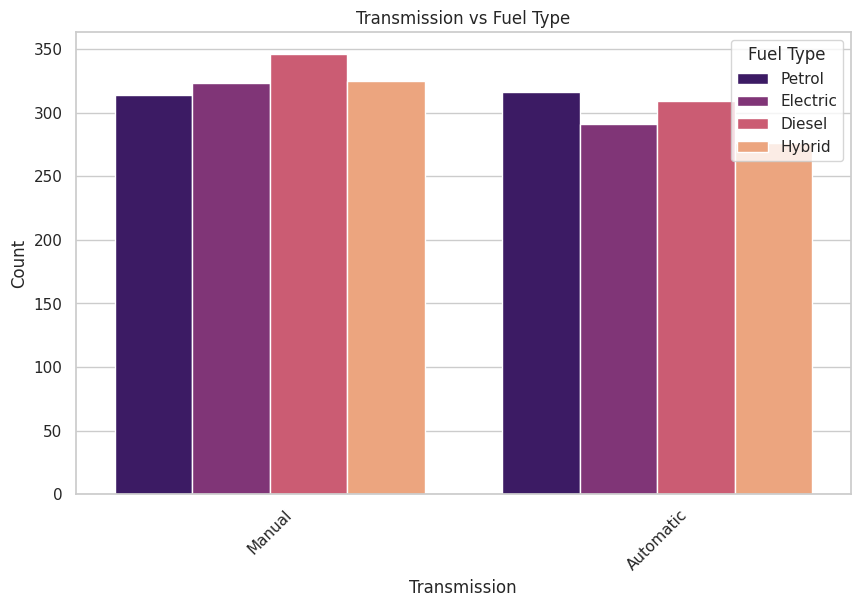

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x="Transmission",hue="Fuel Type",
    data=Data,palette="magma")
plt.title("Transmission vs Fuel Type")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Fuel Type")
plt.show()

# Section 7: Correlation & Final Verdict

### **Chapter 6: The Synthesis (Correlation Matrix)**

Finally, we bring it all together with mathematics to see which numbers move together.

**The "Heatmap" Technique:**
1.  **Selection:** We select only numeric columns (`float64`, `int64`).
2.  **Visualization:** We use a heatmap with `annot=True` to write the exact correlation coefficient (from -1 to 1).

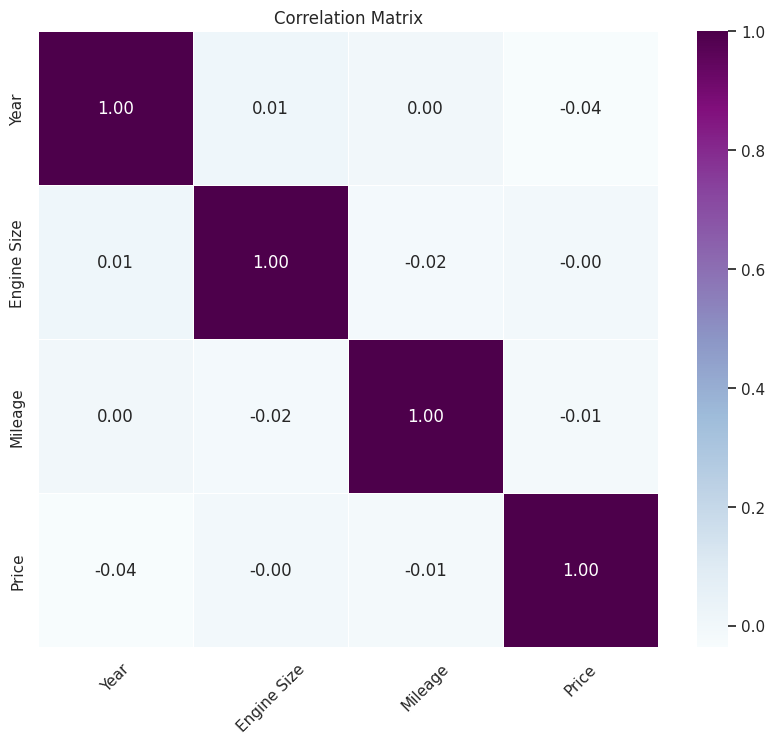

In [21]:
numeric_data = Data.select_dtypes(include=['float64', 'int64'])
correlation = numeric_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="BuPu",lw=0.5)

plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks()
plt.show()

> **🧩 The Matrix of Randomness:**
> Here is where the story takes a twist. In a functioning car market, we expect two undeniable truths:
> 1.  **Mileage vs. Price:** Should be strongly negative (more miles = cheaper car).
> 2.  **Year vs. Price:** Should be strongly positive (newer car = more expensive).
>
> However, our correlation matrix shows values near zero (e.g., Year vs. Price is approx **-0.03**). This confirms that the 'Price' column in this dataset appears to be generated randomly, independent of the car's features. The economic laws of depreciation do not apply here.



### **Final Verdict: A Playground, Not a Market**

This EDA reveals an important lesson for every Data Scientist: **Clean data is not always Real data.**

While this dataset is technically pristine—no missing values, perfect data types, and consistent formatting—it is logically flawed. The existence of gas-powered Teslas and the absence of logical price correlations prove this is a **synthetic dataset**.

**Takeaway:** This dataset is an excellent sandbox for practicing coding pipelines, visualization techniques, and library syntax. However, due to its lack of real-world logic, any predictive model built on it would fail to capture actual market dynamics. We can use it to sharpen our tools, but we shouldn't use it to set prices.